# Carnevale, Cattoni MiniChallenge

We chosed the Hotel dataset

In [349]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from tqdm import tqdm


In [350]:
with open("hotels.pk", "rb") as f:
    df = pickle.load(f)

# 1. EXPLORATORY ANALYSIS

In [351]:
df.shape

(23254, 4)

In [352]:
df.head()

,Location,Revenue,Demand,Occupancy
Date,,,,
2013-01-01,NewYork,2.442363e+06,13063.675000,81.991307
2013-01-02,NewYork,2.018559e+06,13069.608539,82.028548
2013-01-03,NewYork,1.927676e+06,13069.608539,82.028548
2013-01-04,NewYork,1.781664e+06,12653.271887,79.415502
2013-01-05,NewYork,1.824994e+06,12827.322364,80.507892


In [353]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2020-10-22', '2020-10-23', '2020-10-24', '2020-10-25',
               '2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29',
               '2020-10-30', '2020-10-31'],
              dtype='datetime64[ns]', name='Date', length=23254, freq=None)

In [354]:
# mandare
df_date_as_index = df.copy()
df = df.reset_index()
df.head()

,Date,Location,Revenue,Demand,Occupancy
0,2013-01-01,NewYork,2.442363e+06,13063.675000,81.991307
1,2013-01-02,NewYork,2.018559e+06,13069.608539,82.028548
2,2013-01-03,NewYork,1.927676e+06,13069.608539,82.028548
3,2013-01-04,NewYork,1.781664e+06,12653.271887,79.415502
4,2013-01-05,NewYork,1.824994e+06,12827.322364,80.507892


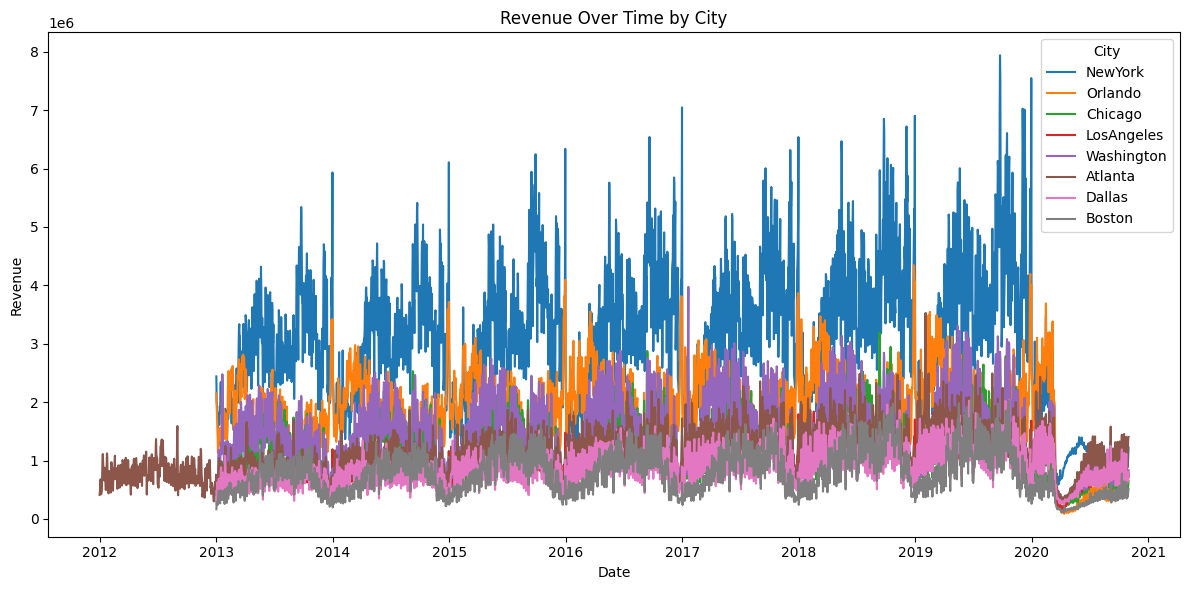

In [355]:
#DA MANDARE

plt.figure(figsize=(12, 6))

for city in df['Location'].unique():
    city_df = df[df['Location'] == city]
    plt.plot(city_df["Date"], city_df["Revenue"], label=city)

plt.ylabel("Revenue")
plt.xlabel("Date")
plt.title("Revenue Over Time by City")
plt.legend(title="City")
plt.tight_layout()
plt.show()


In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23254 entries, 0 to 23253
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       23254 non-null  datetime64[ns]
 1   Location   23254 non-null  object        
 2   Revenue    23254 non-null  float64       
 3   Demand     23254 non-null  float64       
 4   Occupancy  23254 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 908.5+ KB


In [357]:
df.columns

Index(['Date', 'Location', 'Revenue', 'Demand', 'Occupancy'], dtype='object')

In [358]:
df["Location"].value_counts()

Location
Atlanta       3227
NewYork       2861
Orlando       2861
Chicago       2861
LosAngeles    2861
Washington    2861
Dallas        2861
Boston        2861
Name: count, dtype: int64

We chose Los Angeles city

In [359]:
df = df[df["Location"] == "LosAngeles"]
df["Location"].value_counts()

Location
LosAngeles    2861
Name: count, dtype: int64

In [360]:
assert (len(df["Location"].unique()) == 1 )
df = df.drop("Location", axis=1)
df.shape

(2861, 4)

In [361]:
df.isnull().sum()

Date         0
Revenue      0
Demand       0
Occupancy    0
dtype: int64

In [362]:
df.duplicated().sum()

0

In [363]:
assert (df["Date"].dt.year.min() == 2013)
assert (df["Date"].dt.year.max() == 2020)

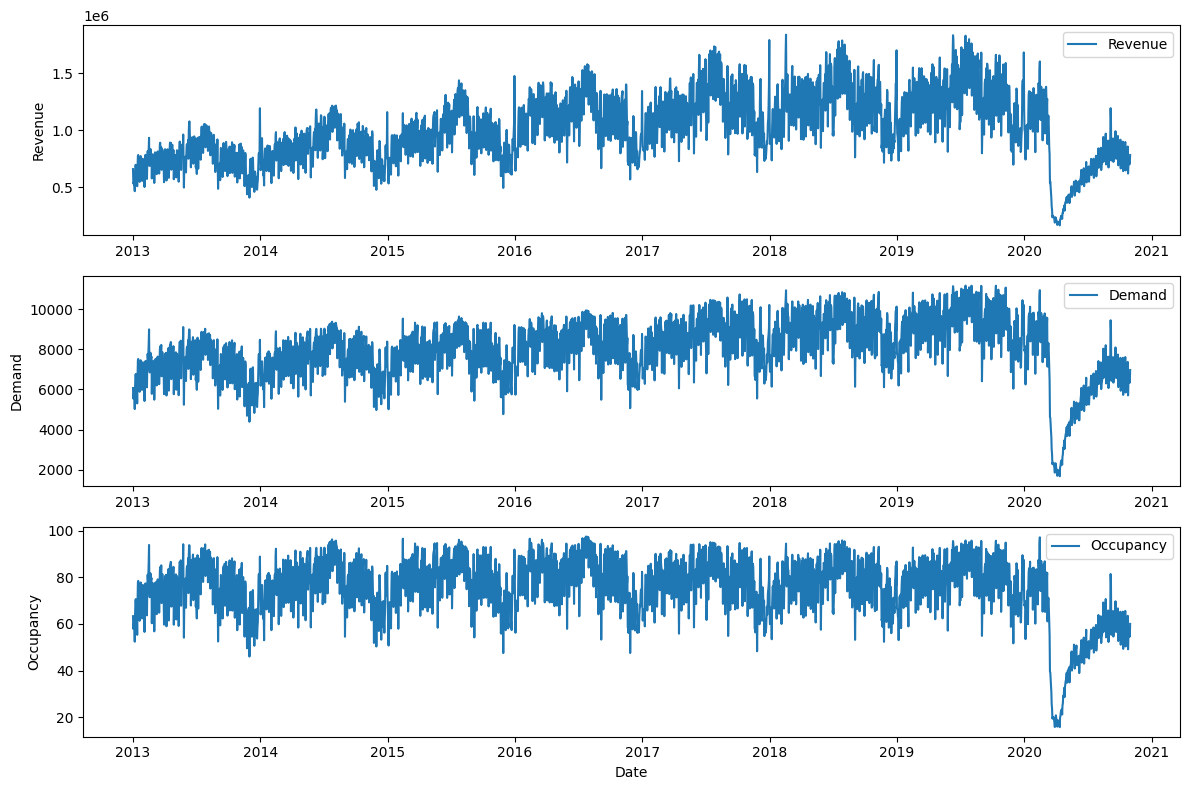

In [364]:
fig, axes = plt.subplots(3, 1, figsize=(12, 8))

axes[0].plot(df["Date"], df["Revenue"], label="Revenue")
axes[0].set_ylabel("Revenue")
axes[0].legend()

axes[1].plot(df["Date"], df["Demand"], label="Demand")
axes[1].set_ylabel("Demand")
axes[1].legend()

axes[2].plot(df["Date"], df["Occupancy"], label="Occupancy")
axes[2].set_ylabel("Occupancy")
axes[2].set_xlabel("Date")
axes[2].legend()

plt.tight_layout()

We have to exclude the data after 2020, so that the pandemic will not cause us any problems.

In [365]:
df = df[df["Date"].dt.year < 2020]

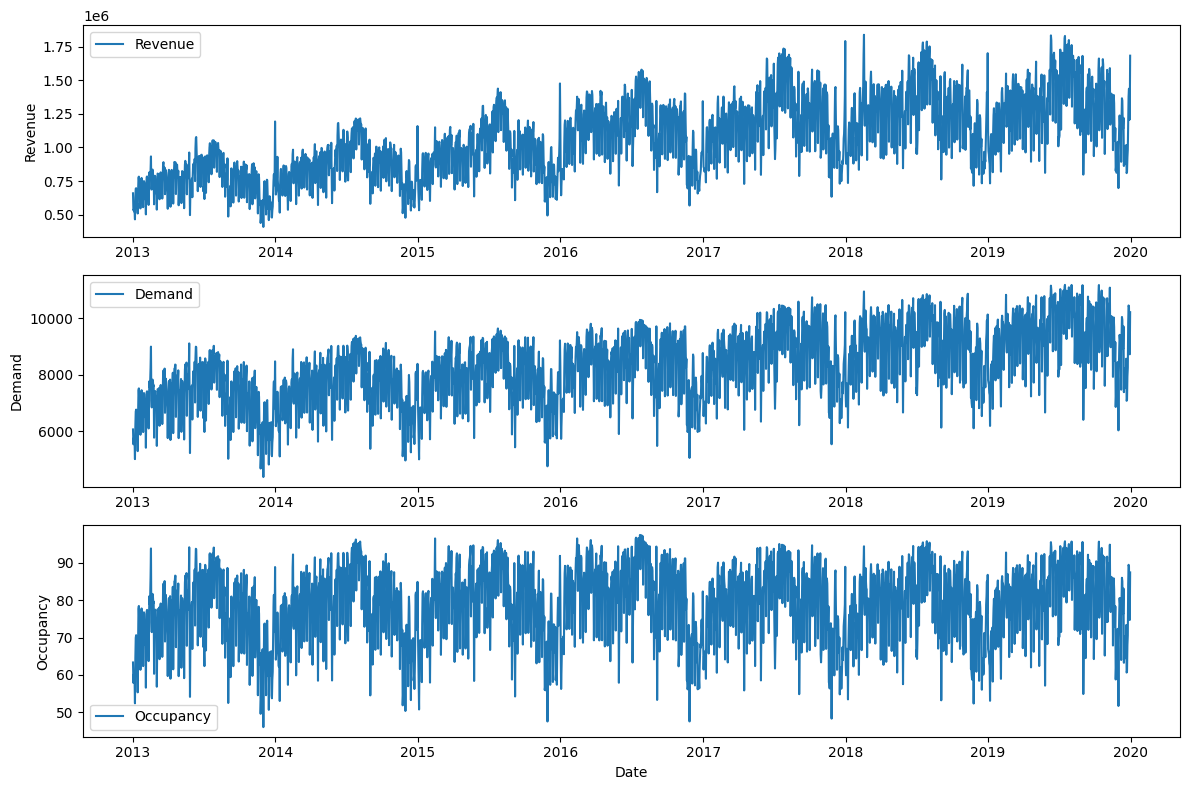

In [366]:
fig, axes = plt.subplots(3, 1, figsize=(12, 8))

axes[0].plot(df["Date"], df["Revenue"], label="Revenue")
axes[0].set_ylabel("Revenue")
axes[0].legend()

axes[1].plot(df["Date"], df["Demand"], label="Demand")
axes[1].set_ylabel("Demand")
axes[1].legend()

axes[2].plot(df["Date"], df["Occupancy"], label="Occupancy")
axes[2].set_ylabel("Occupancy")
axes[2].set_xlabel("Date")
axes[2].legend()

plt.tight_layout()

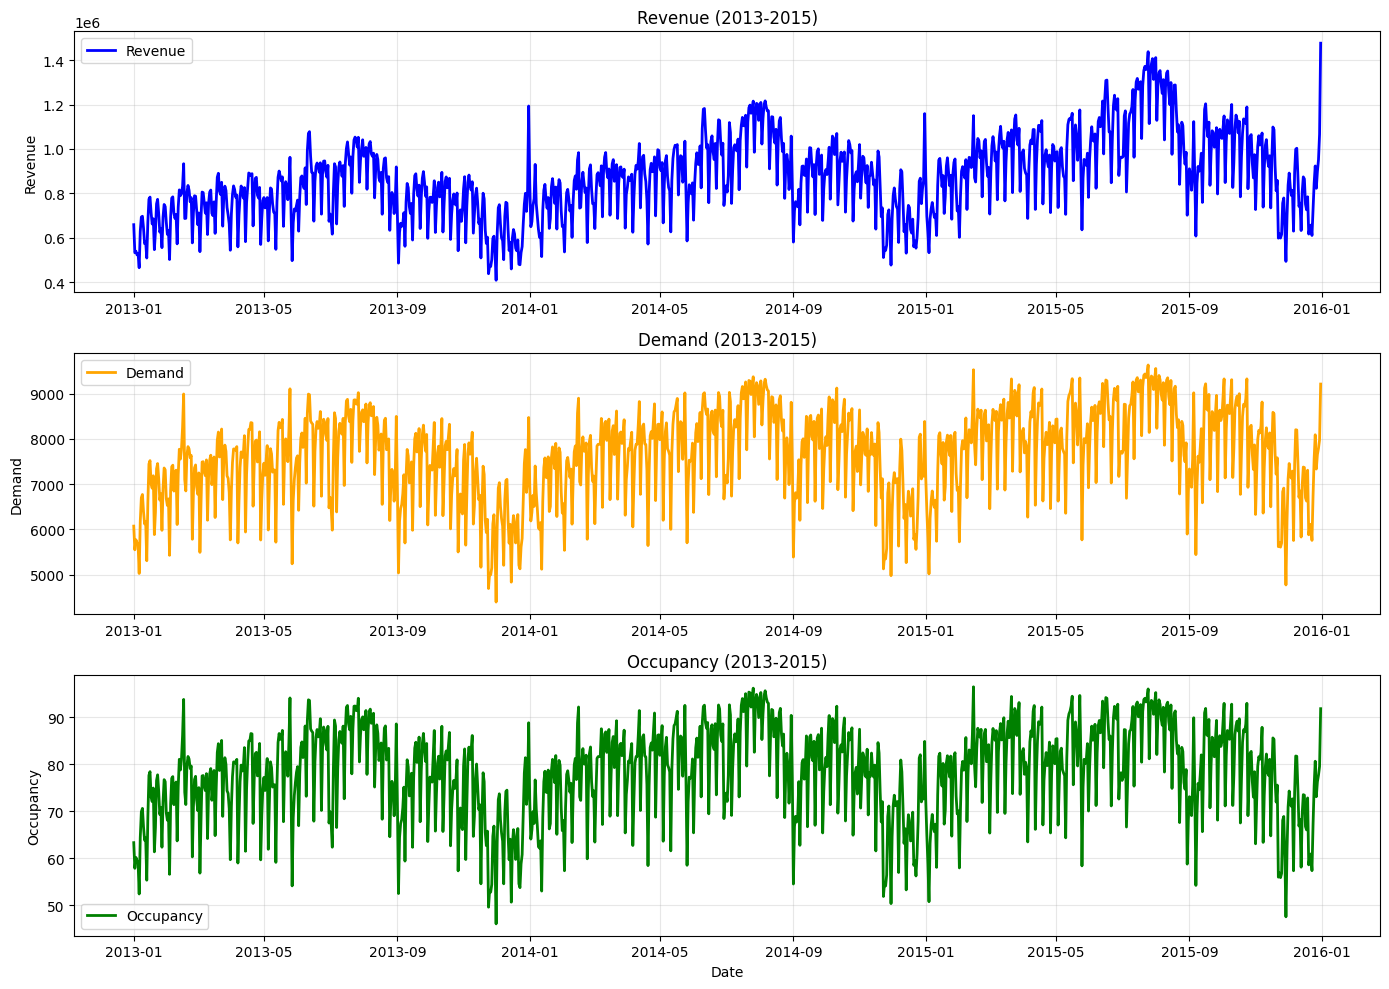

In [367]:
mask = (df["Date"] >= "2013-01-01") & (df["Date"] <= "2015-12-31")
df_filtered = df[mask]

columns = ["Revenue", "Demand", "Occupancy"]
colors = ["blue", "orange", "green"]

fig, axes = plt.subplots(3, 1, figsize=(14, 10))

for idx, (col, color) in enumerate(zip(columns, colors)):
    axes[idx].plot(df_filtered["Date"], df_filtered[col], linewidth=2, label=col, color=color)
    axes[idx].set_ylabel(col)
    axes[idx].set_title(f"{col} (2013-2015)")
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

axes[2].set_xlabel("Date")
plt.tight_layout()
plt.show()


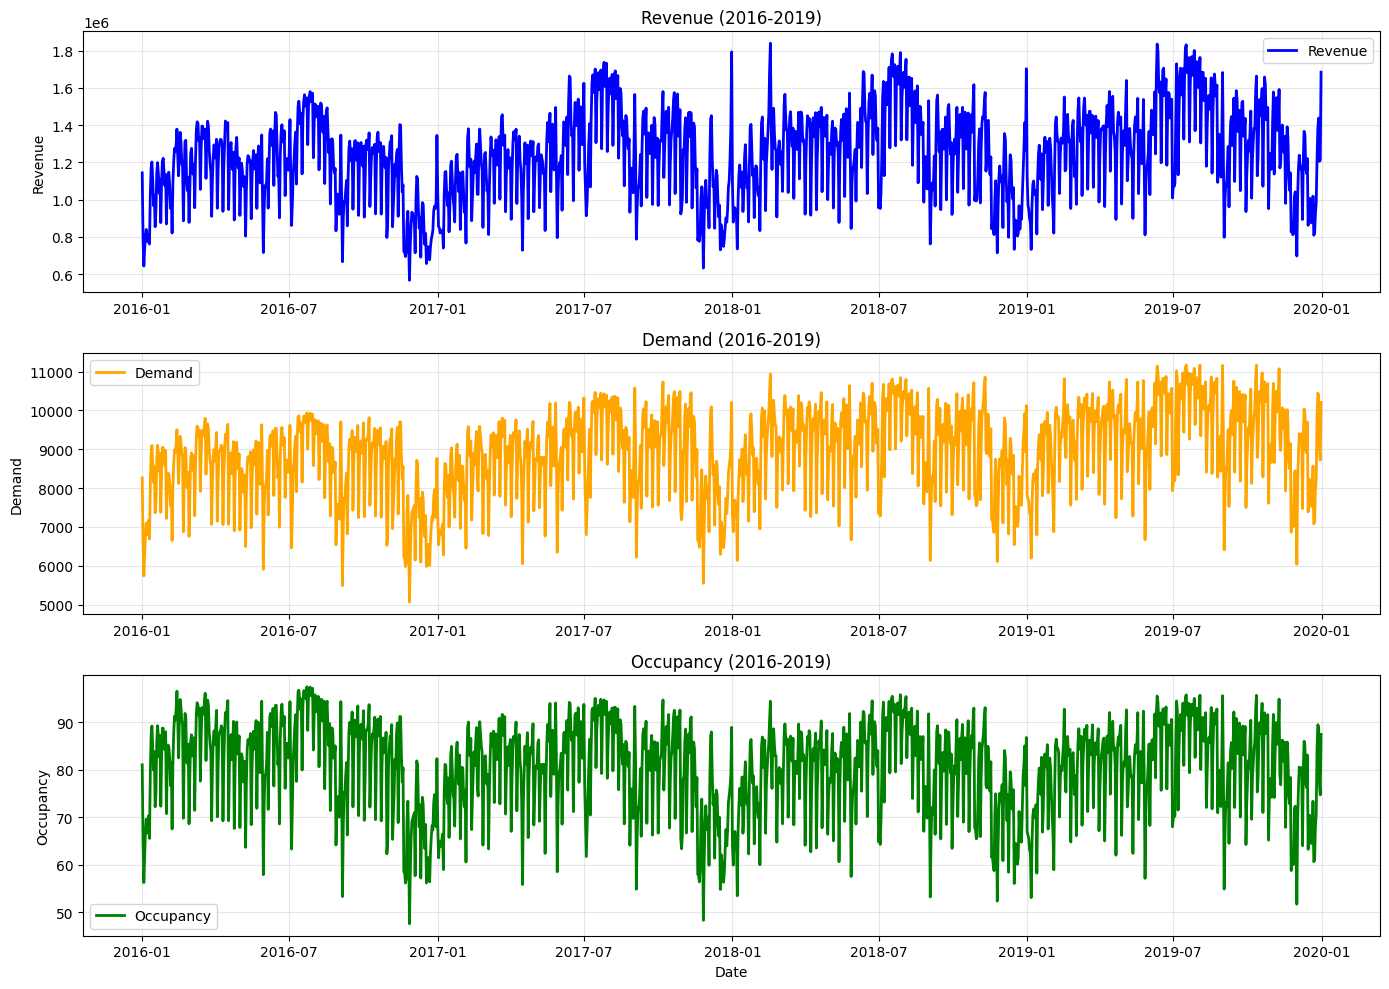

In [368]:
mask = (df["Date"] >= "2016-01-01") & (df["Date"] <= "2019-12-31")
df_filtered = df[mask]

columns = ["Revenue", "Demand", "Occupancy"]
colors = ["blue", "orange", "green"]

fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# date of when the world entered into the "Pandemia"
# pandemic_date = pd.Timestamp("2020-03-11")

for idx, (col, color) in enumerate(zip(columns, colors)):
    axes[idx].plot(df_filtered["Date"], df_filtered[col], linewidth=2, label=col, color=color)
    
    # axes[idx].axvline(pandemic_date, color='red', linestyle='--', linewidth=2.5, label='Pandemic (11 Mar 2020)', alpha=0.8)
    
    axes[idx].set_ylabel(col)
    axes[idx].set_title(f"{col} (2016-2019)")
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

axes[2].set_xlabel("Date")
plt.tight_layout()
plt.show()


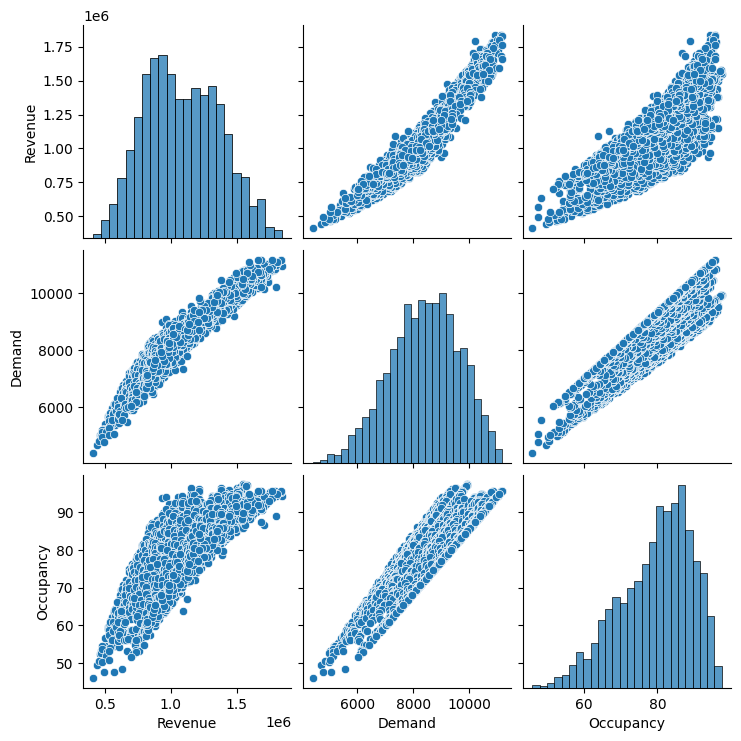

In [369]:
sns.pairplot(df)

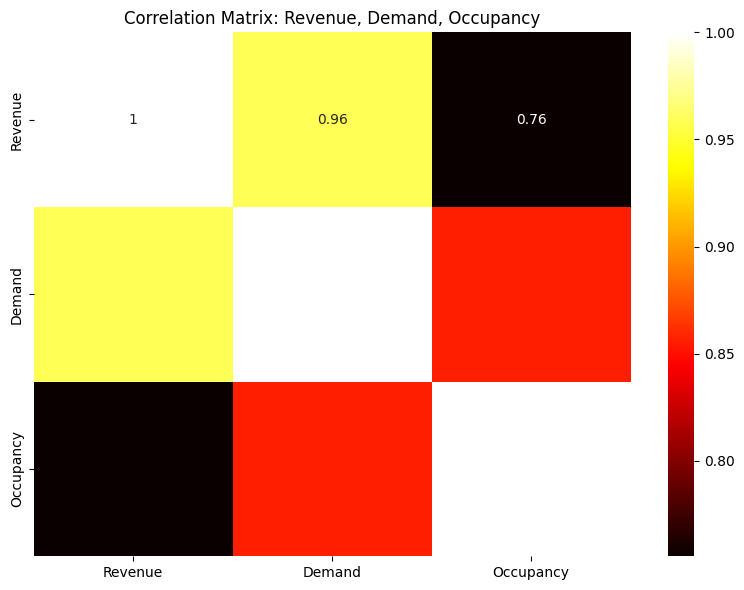

In [370]:
correlation_matrix = df[["Revenue", "Demand", "Occupancy"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap = "hot")
plt.title("Correlation Matrix: Revenue, Demand, Occupancy")
plt.tight_layout()
plt.show()

ACF

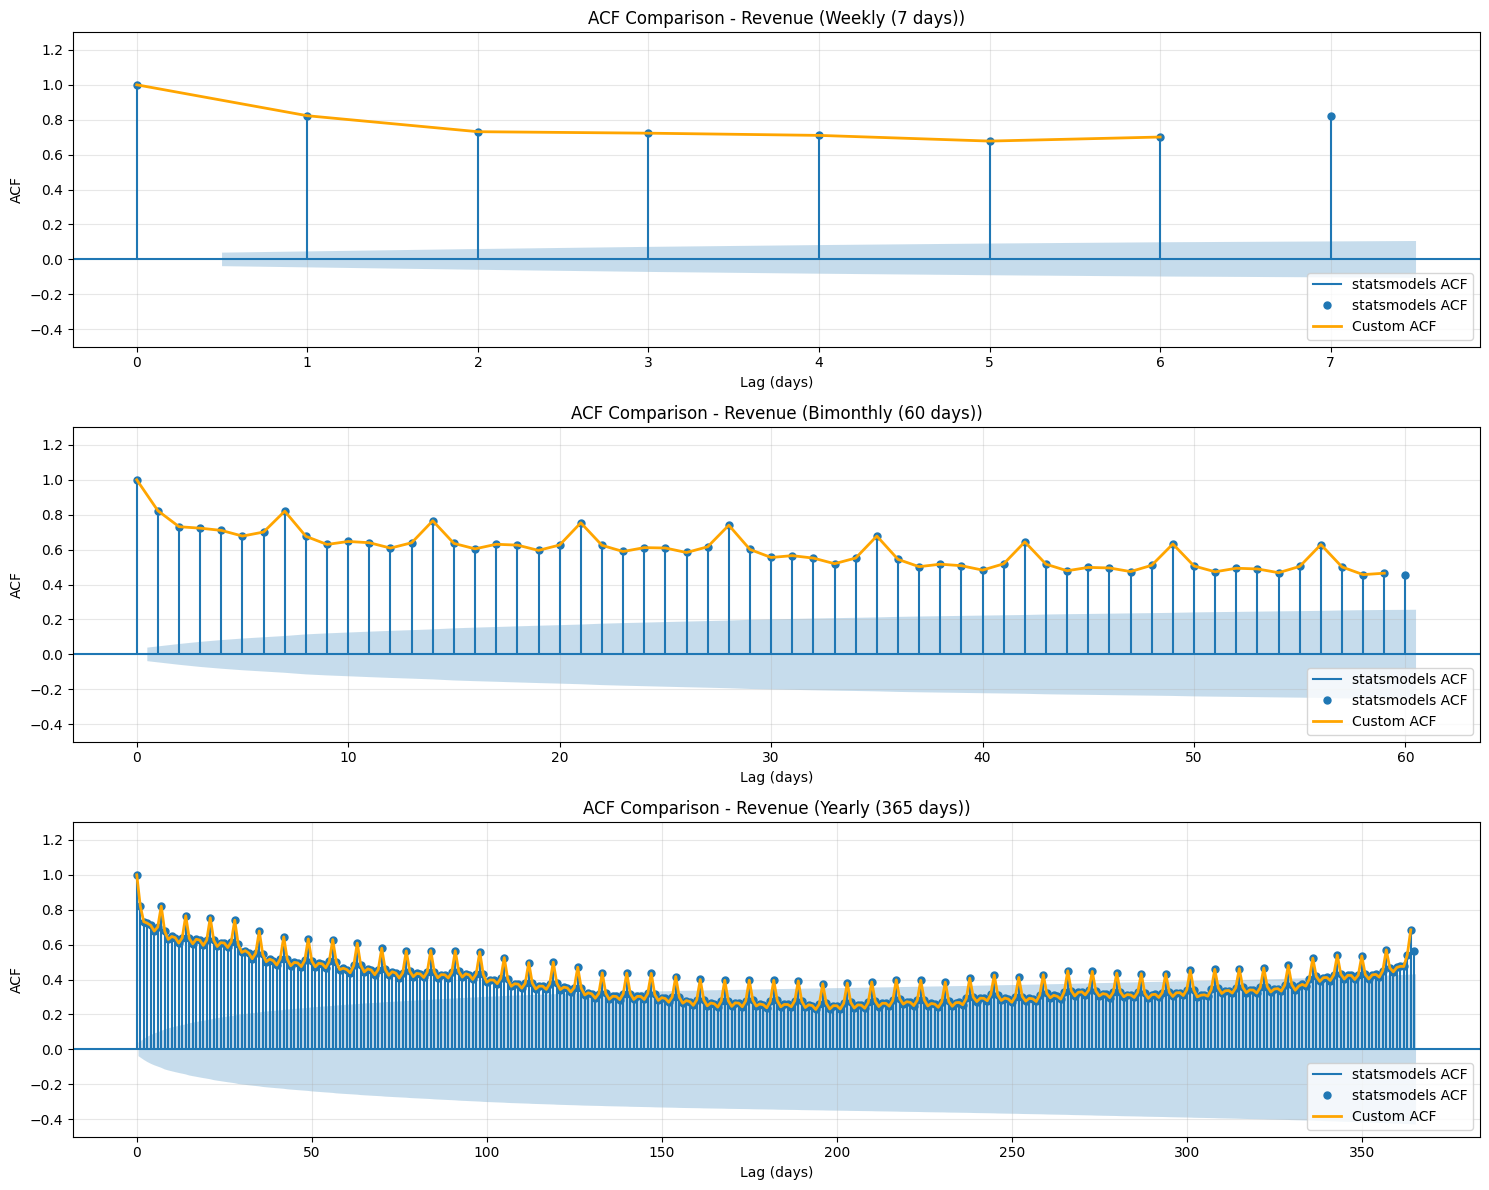

In [371]:
lags_list = [7, 60, 365]
titles = ["Weekly (7 days)", "Bimonthly (60 days)", "Yearly (365 days)"]


acf = lambda x, k: ((x.shift(k) - x.mean()) * (x - x.mean())).sum() / x.std()**2 / len(x)


fig, axes = plt.subplots(3, 1, figsize=(15, 12))


for ax, lags, title in zip(axes, lags_list, titles):
    plot_acf(df['Revenue'], lags=lags, ax=ax, label='statsmodels ACF')
    plt.sca(ax)
    plt.plot([acf(df['Revenue'], k) for k in range(lags)], label='Custom ACF', color='orange', linewidth=2)
    
    ax.set_title(f'ACF Comparison - Revenue ({title})')
    ax.set_xlabel('Lag (days)')
    ax.set_ylabel('ACF')
    ax.grid(True, alpha=0.3)
    ax.set_ylim(-0.5, 1.3)
    ax.legend(loc='lower right')


plt.tight_layout()
plt.show()

# Outlier Detections

## Substitute the festivities

In [372]:
# --- 1. Data Preparation ---
# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index for time series analysis
df = df.set_index('Date')
df = df.sort_index()  # Ensure the data is in chronological order

# Add helper columns for day of week (0=Monday, 6=Sunday), month, and day
df['weekday'] = df.index.dayofweek
df['month'] = df.index.month
df['day'] = df.index.day

# --- 2. Create Holiday Mask (for known outliers) ---
# Define main holidays
is_new_year = (df['month'] == 1) & (df['day'] == 1)
is_july_4th = (df['month'] == 7) & (df['day'] == 4)
is_christmas = (df['month'] == 12) & (df['day'] == 25)

# Define "shoulder" days (the day before and after)
# .shift(1) looks at the previous day, .shift(-1) looks at the next day
is_new_year_eve = is_new_year.shift(-1, fill_value=False)  # Dec 31st
is_day_after_ny = is_new_year.shift(1, fill_value=False)   # Jan 2nd

is_july_3rd = is_july_4th.shift(-1, fill_value=False)
is_july_5th = is_july_4th.shift(1, fill_value=False)

is_christmas_eve = is_christmas.shift(-1, fill_value=False) # Dec 24th
is_boxing_day = is_christmas.shift(1, fill_value=False)      # Dec 26th

# Combine all masks into a single 'holiday_period' mask
holiday_mask = (is_new_year | is_day_after_ny | is_new_year_eve |
                is_july_4th | is_july_3rd | is_july_5th |
                is_christmas | is_christmas_eve | is_boxing_day)

# --- 3. Replace Holiday Outlier Values ---
# Create a copy of the original DataFrame to modify
df_cleaned = df.copy()

print("--- Step 1: Normalizing known holidays ---")

# Iterate over each day of the week (0=Monday to 6=Sunday)
for wd in range(7):
    # 1. Create a mask for "normal" days 
    # (e.g., all Mondays that are NOT holidays)
    normal_days_mask = (df['weekday'] == wd) & (~holiday_mask)
    
    # 2. Calculate the mean revenue for those "normal" days
    mean_revenue = df.loc[normal_days_mask, 'Revenue'].mean()
    
    # 3. Create a mask to identify holidays that fall on this specific weekday
    holiday_days_mask_weekday = (df_cleaned['weekday'] == wd) & (holiday_mask)
    
    # 4. Replace the holiday revenue with the calculated "normal" mean for that weekday
    if not pd.isna(mean_revenue) and holiday_days_mask_weekday.sum() > 0:
        print(f"Replacing {holiday_days_mask_weekday.sum()} holiday outlier(s) on weekday {wd} with mean: {mean_revenue:,.2f}")
        df_cleaned.loc[holiday_days_mask_weekday, 'Revenue'] = mean_revenue
        
# Drop the helper columns as they are no longer needed
df_processed = df_cleaned.drop(columns=['weekday', 'month', 'day'])
df_original = df.drop(columns=['weekday', 'month', 'day']) # Keep original for plotting


--- Step 1: Normalizing known holidays ---
Replacing 8 holiday outlier(s) on weekday 0 with mean: 1,043,596.25
Replacing 11 holiday outlier(s) on weekday 1 with mean: 1,158,379.48
Replacing 12 holiday outlier(s) on weekday 2 with mean: 1,180,460.35
Replacing 11 holiday outlier(s) on weekday 3 with mean: 1,105,327.57
Replacing 8 holiday outlier(s) on weekday 4 with mean: 1,101,981.08
Replacing 6 holiday outlier(s) on weekday 5 with mean: 1,162,692.23
Replacing 6 holiday outlier(s) on weekday 6 with mean: 866,111.89


## FInd others outliers

In [373]:
# --- 4. SECOND PASS: Find and replace other (unknown) outliers ---
print("\n--- Step 2: Finding new outliers on holiday-cleaned data ---")
column_to_analyze = 'Revenue'
n_sigma = 3.0
seasonal_period = 7  # Weekly seasonality

# Decompose the time series on the CLEANED data
decomposition = seasonal_decompose(df_processed[column_to_analyze], model='additive', period=seasonal_period)
residuals = decomposition.resid.dropna()

# Calculate the statistical threshold for outliers
res_mean = residuals.mean()
res_std = residuals.std()

threshold_high = res_mean + (n_sigma * res_std)
threshold_low = res_mean - (n_sigma * res_std)

print(f"Residuals Mean: {res_mean:.2f}")
print(f"Residuals Std Dev: {res_std:.2f}")
print(f"Outlier limits: < {threshold_low:.2f} or > {threshold_high:.2f}")
print("-" * 30)

# Get the indices (dates) of the new outliers
outlier_indices_2nd_pass = residuals[
    (residuals < threshold_low) | (residuals > threshold_high)
].index

print(f"Found {len(outlier_indices_2nd_pass)} new outlier(s) after initial cleaning.")

# Create the final cleaned column
df_processed['Revenue_Final_Cleaned'] = df_processed['Revenue']

# Replace these new outliers with the value from 7 days prior
for idx in outlier_indices_2nd_pass:
    idx_last_week = idx - pd.Timedelta(days=7)
    
    if idx_last_week in df_processed.index:
        # Use the value from the already holiday-cleaned data
        replacement_value = df_processed.loc[idx_last_week, 'Revenue']
        df_processed.loc[idx, 'Revenue_Final_Cleaned'] = replacement_value
        print(f"Replaced {idx.date()}: {df_processed.loc[idx, 'Revenue']:.2f} -> {replacement_value:.2f}")
    else:
        # Fallback if 7 days prior is not available (e.g., at the very start of the series)
        replacement_value = (decomposition.trend[idx] + decomposition.seasonal[idx])
        df_processed.loc[idx, 'Revenue_Final_Cleaned'] = replacement_value
        print(f"Replaced {idx.date()} (first cycle): {df_processed.loc[idx, 'Revenue']:.2f} -> {replacement_value:.2f} (decomposed value)")


--- Step 2: Finding new outliers on holiday-cleaned data ---
Residuals Mean: -123.97
Residuals Std Dev: 75116.99
Outlier limits: < -225474.94 or > 225227.00
------------------------------
Found 43 new outlier(s) after initial cleaning.
Replaced 2013-07-02: 673806.42 -> 945315.82
Replaced 2013-12-23: 478096.53 -> 598597.08
Replaced 2013-12-24: 1158379.48 -> 636875.62
Replaced 2013-12-25: 1180460.35 -> 617106.69
Replaced 2014-01-03: 672135.22 -> 751289.13
Replaced 2014-01-06: 930507.14 -> 813007.78
Replaced 2014-08-31: 841249.75 -> 777428.17
Replaced 2014-12-23: 552869.63 -> 745750.55
Replaced 2014-12-24: 1180460.35 -> 735648.02
Replaced 2015-01-03: 621774.59 -> 868388.03
Replaced 2015-05-25: 635462.66 -> 1024560.65
Replaced 2015-09-07: 607387.07 -> 837539.89
Replaced 2015-12-23: 610118.87 -> 864990.86
Replaced 2016-05-30: 716474.00 -> 1203738.59
Replaced 2016-09-03: 1346890.01 -> 1167431.96
Replaced 2016-09-04: 996475.59 -> 832873.44
Replaced 2016-09-05: 666940.68 -> 967886.77
Replaced

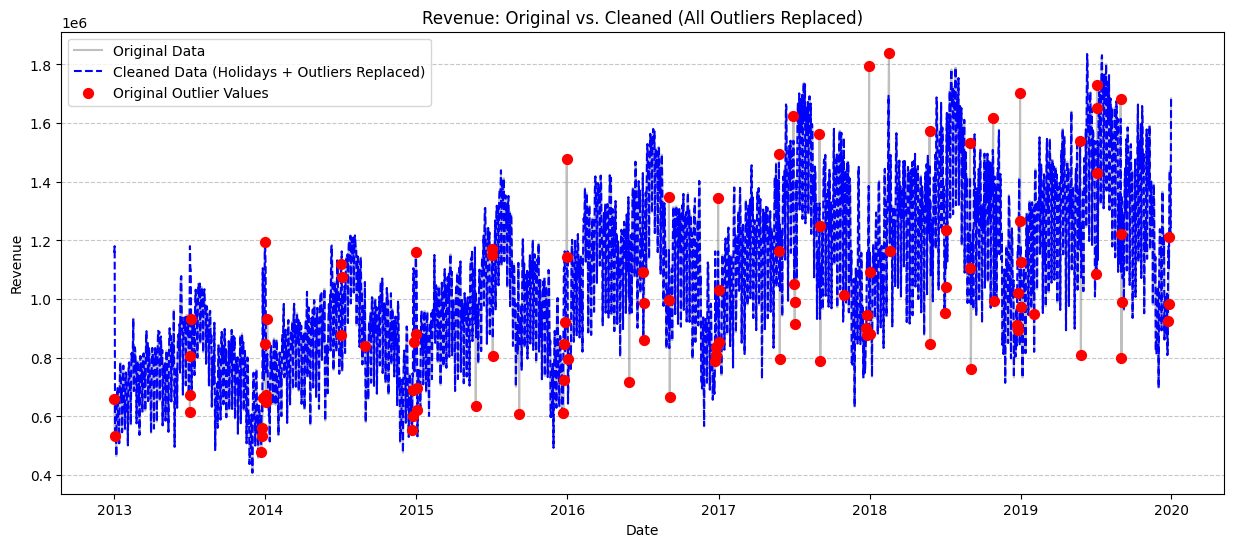

In [374]:
plt.figure(figsize=(15, 6))

# Plot the original, raw data (including holidays)
plt.plot(df_original.index, df_original['Revenue'], color='gray', alpha=0.5, label='Original Data')

# Plot the final, fully cleaned data
plt.plot(df_processed.index, df_processed['Revenue_Final_Cleaned'], color='blue', linestyle='--', label='Cleaned Data (Holidays + Outliers Replaced)')

# Highlight all points that were changed (both holidays and other outliers)
all_changed_indices = df_original.index[holiday_mask].union(outlier_indices_2nd_pass)

if not all_changed_indices.empty:
    plt.scatter(all_changed_indices, 
                df_original.loc[all_changed_indices, 'Revenue'], 
                color='red', 
                label='Original Outlier Values', 
                s=50, 
                zorder=5) # zorder=5 plots these on top

plt.title(f"Revenue: Original vs. Cleaned (All Outliers Replaced)")
plt.ylabel("Revenue")
plt.xlabel("Date")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [375]:
df

,Revenue,Demand,Occupancy,weekday,month,day
Date,,,,,,
2013-01-01,6.587204e+05,6069.818801,63.332834,1,1,1
2013-01-02,5.322572e+05,5546.508060,57.872580,2,1,2
2013-01-03,5.392279e+05,5768.134064,60.185038,3,1,3
2013-01-04,5.227265e+05,5708.578177,59.563629,4,1,4
2013-01-05,5.269779e+05,5662.690855,59.084838,5,1,5
...,...,...,...,...,...,...
2019-12-27,1.380631e+06,10442.806562,89.438220,4,12,27
2019-12-28,1.437999e+06,10389.690559,88.983304,5,12,28
2019-12-29,1.205904e+06,9001.659169,77.095402,6,12,29


In [376]:
df = df_processed
df

,Revenue,Demand,Occupancy,Revenue_Final_Cleaned
Date,,,,
2013-01-01,1.158379e+06,6069.818801,63.332834,1.158379e+06
2013-01-02,1.180460e+06,5546.508060,57.872580,1.180460e+06
2013-01-03,5.392279e+05,5768.134064,60.185038,5.392279e+05
2013-01-04,5.227265e+05,5708.578177,59.563629,5.227265e+05
2013-01-05,5.269779e+05,5662.690855,59.084838,5.269779e+05
...,...,...,...,...
2019-12-27,1.380631e+06,10442.806562,89.438220,1.380631e+06
2019-12-28,1.437999e+06,10389.690559,88.983304,1.437999e+06
2019-12-29,1.205904e+06,9001.659169,77.095402,1.205904e+06


In [377]:
# df = df.reset_index()
# df

## Stationarity and Transformations

In [378]:
import warnings
warnings.filterwarnings('ignore')

stationarity_tests = {}

vars_to_check = ['Revenue', 'Demand', 'Occupancy']

for var in vars_to_check:
    adf_test = adfuller(df[var])
    kpss_test = kpss(df[var], nlags='auto')
    stationarity_tests[var] = pd.Series({'adf pval': adf_test[1], 'kpss pval': kpss_test[1]})

pd.concat(stationarity_tests).unstack().sort_values('adf pval')

,adf pval,kpss pval
Occupancy,0.000809,0.083452
Demand,0.043965,0.010000
Revenue,0.066733,0.010000


These values suggest non-stationarity in this data, we procceed by taking differences of consecutive values to eliminate trends

In [379]:
df['Revenue_diff'] = df['Revenue'].diff()

df['Demand_diff'] = df['Demand'].diff()

adf_d1 = adfuller(df['Revenue_diff'].dropna())
kpss_d1 = kpss(df['Revenue_diff'].dropna(), nlags='auto')

print(f"ADF diff: {adf_d1[1]}")
print(f"KPSS diff: {kpss_d1[1]}")

ADF diff: 2.058286895583237e-21
KPSS diff: 0.1


Both ADF and KPSS tests confirm stationarity of the differenced Revenue series (d=1).

## ACF/PACF

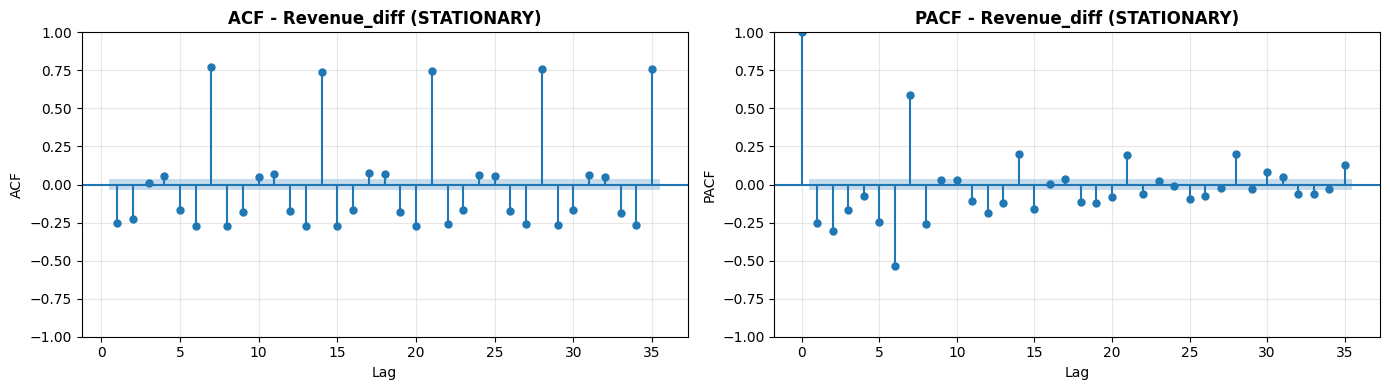

In [380]:
series_diff = df['Revenue_diff'].dropna()

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# ACF of the DIFFERENCED series
plot_acf(series_diff, lags=35, ax=axes[0], zero=False, bartlett_confint=False) #35 lags because it is 7*5
axes[0].set_title('ACF - Revenue_diff (STATIONARY)', fontweight='bold')
axes[0].set_xlabel('Lag')
axes[0].set_ylabel('ACF')
axes[0].grid(True, alpha=0.3)

# PACF of the DIFFERENCED series
plot_pacf(series_diff, lags=35, ax=axes[1], method='ywm') #35 lags because it is 7*5
axes[1].set_title('PACF - Revenue_diff (STATIONARY)', fontweight='bold')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('PACF')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Model Selection and Evaluation

In [381]:
# Helper to return forecast as dataframe
def cast_df(y, df):
    h = len(y)
    return pd.DataFrame(y, index=np.arange(len(df), len(df)+h))

y = df['Revenue']

# Forecasting functions
naive = lambda x, h: cast_df(np.tile(x.iloc[-1], h), x)
mean = lambda x, h: cast_df(np.tile(x.mean(), h), x)

# For daily data, weekly pattern (p = 7)
p = 7

seasonal = lambda x, h: cast_df(np.tile(x.iloc[-p:].values.ravel()-x.iloc[-p:].values[0]+x.iloc[-p:].values[-1], int(p*np.ceil(h/p)))[:h], x)

seasonal_alternative = lambda x, h: cast_df(np.tile(x.iloc[-p:].values, int(np.ceil(h/p)))[:h],x)

In [382]:
# MANDARE
# Forecast horizon (7 days)
steps_ahead = p = 7
train = y.iloc[:-steps_ahead]
test = y.iloc[-steps_ahead:]

# Forecasts
forecasters = [naive, mean, seasonal, seasonal_alternative]
names = ['Naive', 'Mean', 'Seasonal Naive', 'Seasonal Naive Semplified']
# forecasts = {n: f(train, steps_ahead) for f, n in zip(forecasters, names)}

forecasts_wrong_index = {n: f(train, steps_ahead) for f, n in zip(forecasters, names)}

basic_predictions = {}
for name, f_df in forecasts_wrong_index.items():
    basic_predictions[name] = pd.DataFrame(f_df.values, index=test.index)

# Combine for evaluation
results = pd.DataFrame({
    'Actual': test.values,
    **{n: f.values.flatten() for n, f in basic_predictions.items()}
}, index=test.index)

# Evaluate performance
mae = results.apply(lambda col: np.mean(np.abs(results['Actual'] - col)))
mape = results.apply(lambda col: np.mean(np.abs((results['Actual'] - col) / results['Actual'])) * 100)

print("MAE:")
print(mae)
print("\nMAPE (%):")
print(mape)

MAE:
Actual                            0.000000
Naive                        171876.076385
Mean                         227328.928311
Seasonal Naive               209217.035067
Seasonal Naive Semplified    379605.358886
dtype: float64

MAPE (%):
Actual                        0.000000
Naive                        11.677112
Mean                         15.773210
Seasonal Naive               15.238592
Seasonal Naive Semplified    28.431892
dtype: float64


In [383]:
basic_predictions

{'Naive':                        0
 Date                    
 2019-12-25  1.158379e+06
 2019-12-26  1.158379e+06
 2019-12-27  1.158379e+06
 2019-12-28  1.158379e+06
 2019-12-29  1.158379e+06
 2019-12-30  1.158379e+06
 2019-12-31  1.158379e+06,
 'Mean':                        0
 Date                    
 2019-12-25  1.087769e+06
 2019-12-26  1.087769e+06
 2019-12-27  1.087769e+06
 2019-12-28  1.087769e+06
 2019-12-29  1.087769e+06
 2019-12-30  1.087769e+06
 2019-12-31  1.087769e+06,
 'Seasonal Naive':                        0
 Date                    
 2019-12-25  1.158379e+06
 2019-12-26  1.046267e+06
 2019-12-27  1.048971e+06
 2019-12-28  1.188914e+06
 2019-12-29  9.796090e+05
 2019-12-30  9.902572e+05
 2019-12-31  1.328768e+06,
 'Seasonal Naive Semplified':                        0
 Date                    
 2019-12-25  9.879912e+05
 2019-12-26  8.758785e+05
 2019-12-27  8.785828e+05
 2019-12-28  1.018526e+06
 2019-12-29  8.092207e+05
 2019-12-30  8.198689e+05
 2019-12-31  1.158379e+

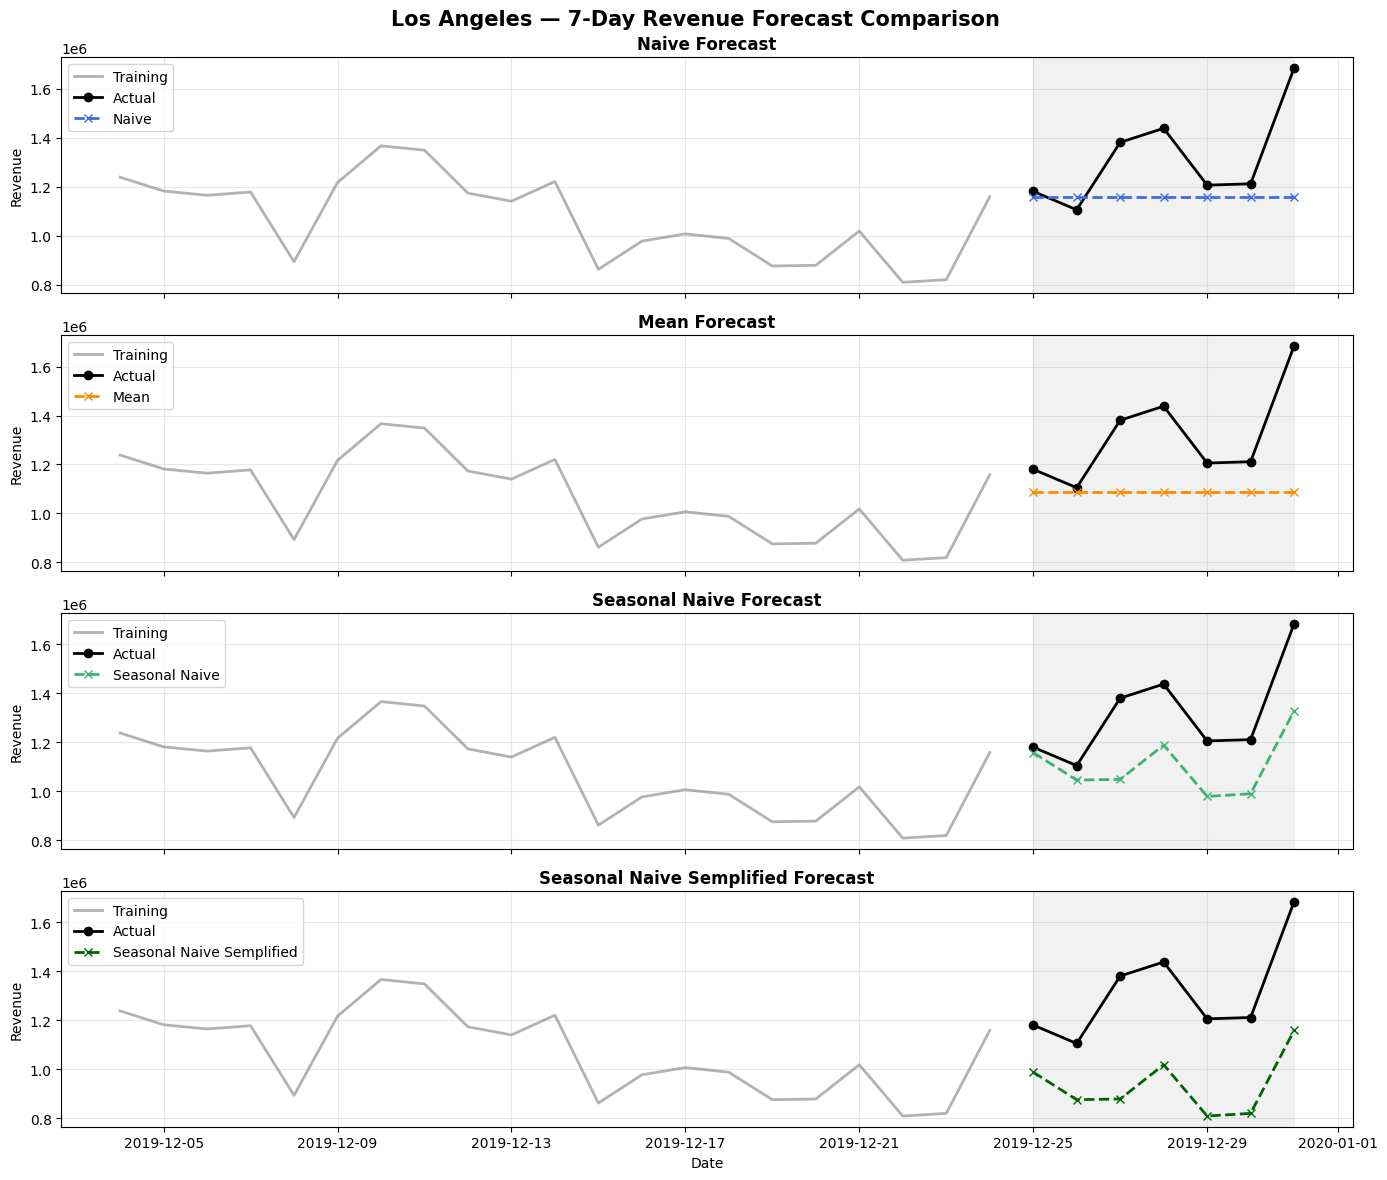

In [384]:
# Lookback period (for context before forecast)
lookback = p * 3
plot_start = len(train) - lookback

# Set up figure — 4 rows, one for each forecast
fig, axes = plt.subplots(4, 1, figsize=(14, 12), sharex=True)

colors = ['royalblue', 'darkorange', 'mediumseagreen', 'darkgreen']

for ax, (name, forecast), color in zip(axes, basic_predictions.items(), colors):
    ax.plot(train.index[plot_start:], train.iloc[plot_start:], color='gray', label='Training', linewidth=2, alpha=0.6)
    ax.plot(test.index, test.values, color='black', label='Actual', marker='o', linewidth=2)
    ax.plot(forecast.index, forecast.values, color=color, linestyle='--', marker='x', linewidth=2, label=f'{name}')
    ax.axvspan(test.index[0], test.index[-1], color='lightgray', alpha=0.3)
    ax.set_title(f"{name} Forecast", fontweight='bold')
    ax.set_ylabel("Revenue")
    ax.grid(alpha=0.3)
    ax.legend(loc='upper left')

plt.suptitle("Los Angeles — 7-Day Revenue Forecast Comparison", fontsize=15, weight='bold')
plt.xlabel("Date")
plt.tight_layout()
plt.show()


In [385]:
df.tail()

,Revenue,Demand,Occupancy,Revenue_Final_Cleaned,Revenue_diff,Demand_diff
Date,,,,,,
2019-12-27,1.380631e+06,10442.806562,89.438220,1.380631e+06,275302.934048,602.315426
2019-12-28,1.437999e+06,10389.690559,88.983304,1.437999e+06,57368.714131,-53.116003
2019-12-29,1.205904e+06,9001.659169,77.095402,1.205904e+06,-232095.701776,-1388.031390
2019-12-30,1.211344e+06,8721.046324,74.692072,1.211344e+06,5440.239383,-280.612844
2019-12-31,1.684020e+06,10205.287833,87.403973,1.684020e+06,472676.390048,1484.241508


## ARIMA

In [386]:
def format_data(y, covariate_lags, target_lags=None):
    """Format data for autoregressive model"""
    x = []
    target = []
    
    for i in np.sort(covariate_lags)[::-1]:
        y_lagged = y.shift(i)
        y_lagged.name = f'y_{i:02d}'  
        x.append(y_lagged)
    x = pd.concat(x, axis=1).dropna()

    if target_lags is not None:
        for i in target_lags:
            y_lagged = y.shift(i)
            y_lagged.name = f'y_{i:02d}'  
            target.append(y_lagged)
        target = pd.concat(target, axis=1)
        df = pd.concat({'x': x, 'target': target}, axis=1)
        df = df.dropna()
        x = df['x']
        target = df['target']

    return x, target

x, y = format_data(df['Revenue'], covariate_lags=list(range(1, 15)), target_lags=[0])
lags_to_plot = ['y_03', 'y_07', 'y_14'] 

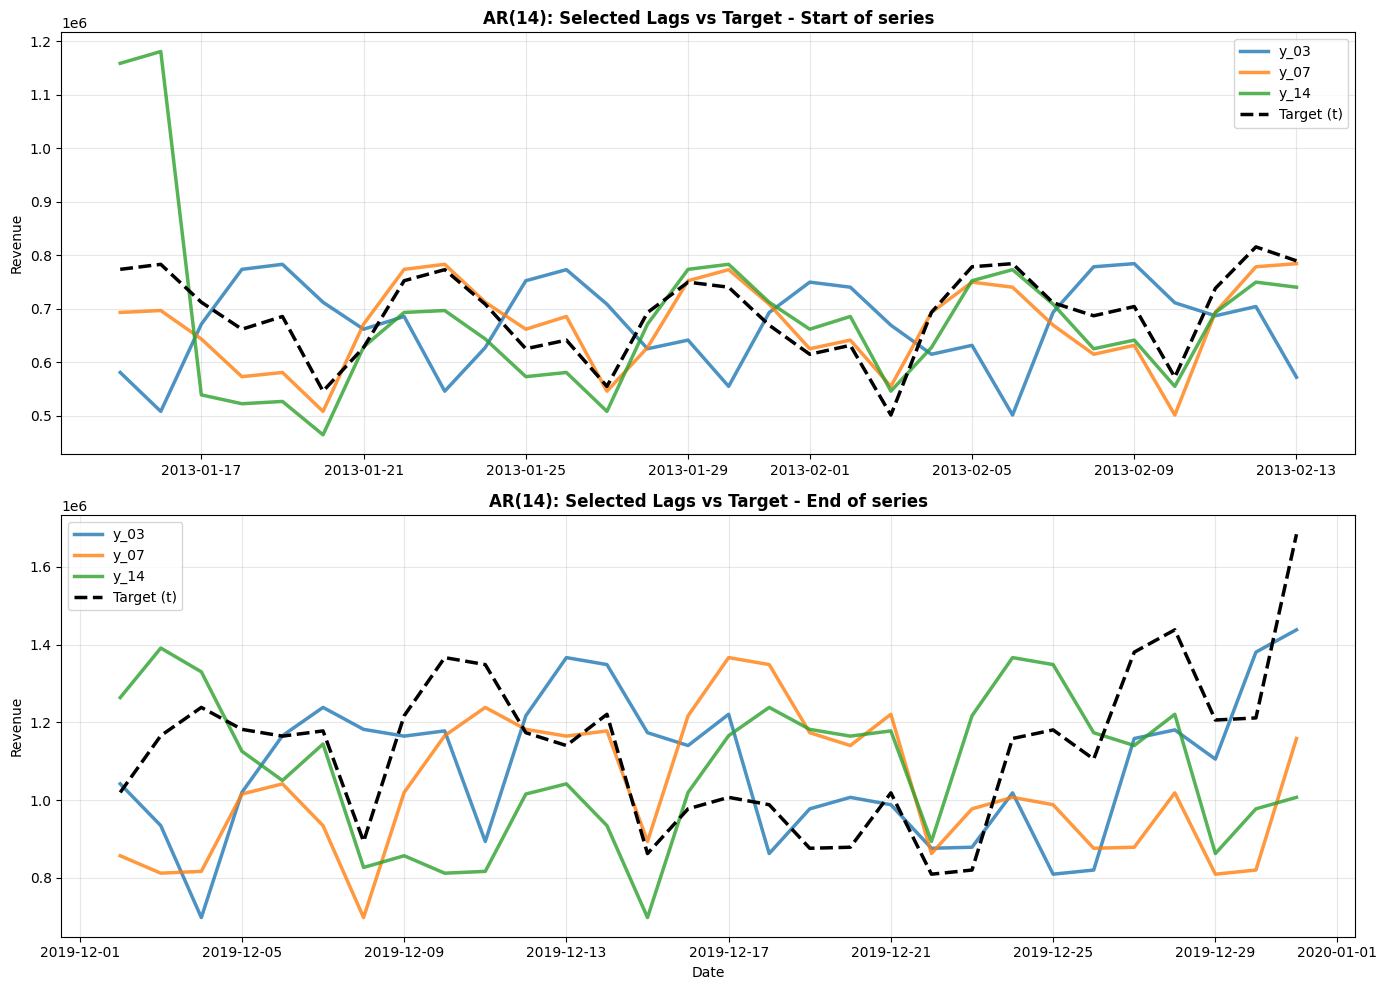

In [387]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

window_size = 30

# --- Primo subplot: inizio della serie ---
ax = axes[0]
x_subset = x.iloc[:window_size]
y_subset = y.iloc[:window_size]

for lag_name in lags_to_plot:
    ax.plot(x_subset.index, x_subset[lag_name].values, linewidth=2.5, alpha=0.8, label=lag_name)

ax.plot(y_subset.index, y_subset.values, color='black', linestyle='--', linewidth=2.5, label='Target (t)')
ax.set_title(f"AR(14): Selected Lags vs Target - Start of series", fontweight='bold', fontsize=12)
ax.set_ylabel("Revenue")
ax.legend(loc='best')
ax.grid(alpha=0.3)

# --- Secondo subplot: fine della serie ---
ax = axes[1]
x_subset = x.iloc[-window_size:]
y_subset = y.iloc[-window_size:]

for lag_name in lags_to_plot:
    ax.plot(x_subset.index, x_subset[lag_name].values, linewidth=2.5, alpha=0.8, label=lag_name)

ax.plot(y_subset.index, y_subset.values, color='black', linestyle='--', linewidth=2.5, label='Target (t)')
ax.set_title(f"AR(14): Selected Lags vs Target - End of series", fontweight='bold', fontsize=12)
ax.set_ylabel("Revenue")
ax.set_xlabel("Date")
ax.legend(loc='best')
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [388]:
class AR_forecaster:
  covariate_lags:list = [1, 2, 3, 4, 5, 6, 7]
  theta:np.array=None
  def __init__(self, covariate_lags=[1]):
    self.covariate_lags = covariate_lags
    self.theta = np.zeros(len(covariate_lags))

  def fit(self, y:pd.Series):
    # obtain the lags defining the model's features
    x, y = format_data(y, covariate_lags=self.covariate_lags, target_lags=[0])
    # fit the parameters
    self.theta = np.linalg.inv(x.values.T @ x.values) @ x.values.T @ y.values
    return self

  def predict(self, y:pd.Series, steps_ahead=1):
      # recursive prediction: at each step the model predicts one step ahead
      # the prediction is then used as last observation
      y_pred = []
      x_i, _ = format_data(y, covariate_lags=self.covariate_lags)
      x_i = x_i.iloc[[-1], :].values

      for i in range(steps_ahead):
          # prediction step
          y_pred_i = x_i @ self.theta
          # store the prediction
          y_pred.append(y_pred_i)
          # recursive strategy - augment and roll the feature vector
          x_i = np.hstack([x_i, y_pred_i])
          x_i = x_i[:, 1:]
      
      # Create appropriate index
      if isinstance(y.index, pd.DatetimeIndex):
          index = pd.date_range(start=y.index[-1]+pd.Timedelta(days=1), periods=steps_ahead, freq='D')
      else:
          index = np.arange(len(y), len(y)+steps_ahead)

      return pd.Series(np.hstack(y_pred).ravel(), index=index)

In [389]:
def evaluate_model(model_class, y, steps_ahead, tr_ratio=0.95, **model_kwargs):
  n_tr = int(len(y)*tr_ratio)
  n_val = len(y) - n_tr
  y_tr = y.iloc[:n_tr]
  model = model_class(**model_kwargs).fit(y_tr)
  y_hats = []
  errs = []
  for i in range(n_val-steps_ahead):
    y_hat_i = model.predict(y.iloc[:n_tr+i], steps_ahead=steps_ahead).values
    y_hats.append(y_hat_i)
    y_true_i = y.iloc[n_tr+i:n_tr+i+steps_ahead].values.ravel()
    errs.append((y_hat_i - y_true_i))
  y_hats = np.vstack(y_hats)
  errs = np.vstack(errs)
  score = np.mean((np.mean(np.abs(np.array(errs)), axis=1)))
  return score, y_hats, errs

In [390]:
y_orig = df['Revenue']
y_diff = series_diff

tr_ratio = 0.87
steps_ahead = 7

def evaluate_model_with_inversion(model_class, y_orig, y_diff, steps_ahead, tr_ratio=0.95, **model_kwargs):
    
    # Allinea gli indici per sicurezza
    y_orig = y_orig[y_diff.index] 
    
    n_tr = int(len(y_diff) * tr_ratio)
    n_val = len(y_diff) - n_tr
    
    # A) Addestra su dati DIFFERENZIATI
    y_tr_diff = y_diff.iloc[:n_tr]
    model = model_class(**model_kwargs).fit(y_tr_diff) # Addestra su 'train'
    
    errs = []
    predictions = []
    
    for i in range(n_val - steps_ahead):
        history_diff = y_diff.iloc[:n_tr + i]
        
        y_hat_diff_i = model.predict(history_diff, steps_ahead=steps_ahead).values
        
        last_known_revenue = y_orig.iloc[n_tr + i - 1] 
        y_hat_i = last_known_revenue + np.cumsum(y_hat_diff_i)
        
        y_true_i = y_orig.iloc[n_tr + i : n_tr + i + steps_ahead].values.ravel()
        errs.append((y_hat_i - y_true_i))
        predictions.append(y_hat_i)
        
    last_errs = errs[-1]
    score = np.mean((np.mean(np.abs(np.array(errs)), axis=1)))
    last_forecast = predictions[-1]
    
    return score, model, last_forecast, last_errs

ar_lags = [1, 3, 5, 7, 10, 14]
ar_models = {}
ar_scores = {}
ar_predictions = {}
ar_errors = {}

print("Evaluating AR models (with differencing and inversion)...")
for lag in ar_lags:
    
    score, fitted_model, prediction, error = evaluate_model_with_inversion(
        AR_forecaster, 
        y_orig=y_orig, 
        y_diff=y_diff, 
        covariate_lags=range(1, lag+1), 
        steps_ahead=steps_ahead,
        tr_ratio=tr_ratio
    )
    
    ar_scores[f"AR({lag})"] = score
    ar_models[f"AR({lag})"] = fitted_model 
    ar_predictions[f"AR({lag})"] = prediction
    ar_errors[f"AR({lag})"] = error

    # print(ar_predictions[lag])
    print(f"{lag} MAE: {score:.2e}")

best_lag = min(ar_scores, key=ar_scores.get) # ERRORE CORRETTO: era 'best_log'
best_mae = ar_scores[best_lag]

print(f"\n🏆 Best model: {best_lag} with MAE = {best_mae:.2e}")

best_model = ar_models[best_lag]

Evaluating AR models (with differencing and inversion)...
1 MAE: 1.88e+05
3 MAE: 2.00e+05
5 MAE: 1.98e+05
7 MAE: 2.41e+05
10 MAE: 2.38e+05
14 MAE: 2.40e+05

🏆 Best model: AR(1) with MAE = 1.88e+05


## Confronto con i modelli di prima

# HOLT WINTER

In [391]:
# y_orig = df['Revenue']
# tr_ratio = 0.87

train_size = int(len(y_orig)*(tr_ratio))

df_tr = y_orig.iloc[:train_size]
df_te = y_orig.iloc[train_size:]

print(f"The test size is {len(df_te)}")
print(f"The train size is {len(df_tr)}")

def holt_winters(y, s_init=None, h=1, alpha=0.8, beta=0.1, gamma=0.1, m=7, return_s=False):
  l, l_past = 0, 0
  s = s_init.copy() if s_init is not None else np.zeros(m)
  b = 0
  for t, y_t in enumerate(y):
    index = t%m
    s[index] = gamma*(y_t-l_past-b) + (1-gamma)*s[index-m]
    l = alpha*(y_t-s[index]) + (1-alpha)*(l_past+b)
    b = beta*(l-l_past) + (1-beta)*b
    l_past = l

  seasonal = np.roll(s, -index)[:h]

  preds = l + b*np.arange(h) + seasonal

  if return_s:
    return preds, s
  else:
    return preds

The test size is 333
The train size is 2223


In [392]:
def get_scores(y, n_steps, n_sa, alpha, beta, gamma, m=7):
  
  y_hat = []
  y_np = y.values.ravel()
  scores = np.zeros(n_steps)
  s_init = y_np[:m]

  for i in range(n_steps):
    y_hat = holt_winters(np.copy(y_np[:np.maximum(1, i)]), s_init,  n_sa, alpha=alpha, beta=beta, gamma=gamma, m=m)
    errs = y_hat-y_np[np.maximum(1, i):np.maximum(1, i)+n_sa]
    scores[i] = np.mean(errs**2)**0.5
    
  return np.mean(scores[m:])

In [393]:
n_trials = 500
pars = np.random.rand(n_trials, 3)
scores = np.zeros(n_trials)
print('start fitiing')

for n in tqdm(range(n_trials)):
    
    alpha, beta, gamma = pars[n, :]
    scores[n] = get_scores(df_tr, n, steps_ahead, alpha, beta, gamma, steps_ahead)
    
best_pars = pars[np.argmin(scores), :]

alpha, beta, gamma = best_pars

print(f'best pars: {alpha}, {beta} ,{gamma}')

start fitiing


100%|██████████| 500/500 [00:11<00:00, 44.66it/s] 

best pars: 0.12593096494359823, 0.8062936671325367 ,0.9570011339541018


In [394]:
y_hat_test = []
y_test_np = df_te.values.ravel()
s_init = df_tr.iloc[-steps_ahead:].values

for i in range(len(y_test_np) - steps_ahead):
    history = np.concatenate([df_tr.values, y_test_np[:i]])
    
    y_hat_i = holt_winters(
            history, 
            s_init=s_init, 
            h=steps_ahead, 
            alpha=alpha, 
            beta=beta, 
            gamma=gamma, 
            m=steps_ahead
        )
    y_hat_test.append(y_hat_i)    

y_hat_test = np.vstack(y_hat_test)

y_true_test = []
for i in range(len(y_test_np) - steps_ahead):
    y_true_test.append(y_test_np[i : i + steps_ahead])
y_true_test = np.vstack(y_true_test)

final_mae_hw = np.mean(np.abs(y_true_test - y_hat_test))
print(f"MAE Final Holt-Winters: {final_mae_hw:.2e}")

MAE Final Holt-Winters: 2.15e+05


In [395]:
s_init = df_tr.iloc[-steps_ahead:].values

y_hat_last_7 = holt_winters(
    df_tr.values, 
    s_init=s_init, 
    h=steps_ahead,
    alpha=alpha, 
    beta=beta, 
    gamma=gamma, 
    m=steps_ahead
)

### Evaluation with Forecast, about the last days that we know

Running backtests for baseline models...
Seasonal Naive    143874.765187
Best AR(1)        187946.000627
Naive             192670.922275
Holt-Winters      214946.038217
dtype: float64

--- VERDICT ---
🏆 The best model (properly tested) is: Seasonal Naive MAE = 1.44e+05


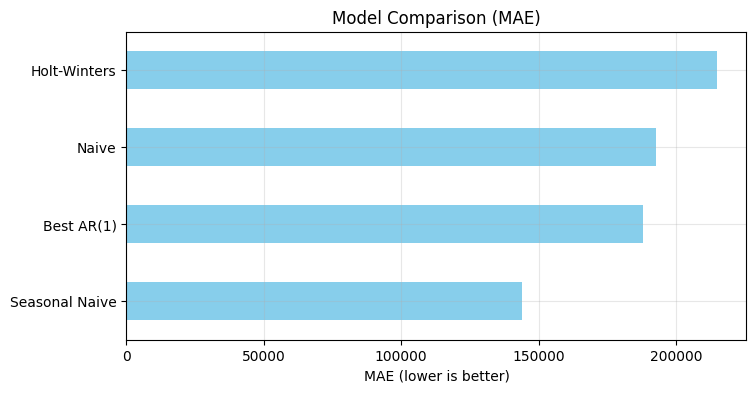

In [396]:
def naive_forecaster(x, h):
    return cast_df(np.tile(x.iloc[-1], h), x)


def seasonal_naive_forecaster(x, h, p=7): 
    return cast_df(np.tile(x.iloc[-p:].values, int(np.ceil(h/p)))[:h], x)


def evaluate_baseline(forecaster_func, y_orig, steps_ahead, tr_ratio=0.95, **func_kwargs):
    
    n_tr = int(len(y_orig) * tr_ratio)
    n_val = len(y_orig) - n_tr
    
    errs = []
    
    for i in range(n_val - steps_ahead):
        history_orig = y_orig.iloc[:n_tr + i]
        
        y_hat_i = forecaster_func(history_orig, steps_ahead, **func_kwargs).values.flatten()
        
        y_true_i = y_orig.iloc[n_tr + i : n_tr + i + steps_ahead].values.ravel()
        
        if len(y_hat_i) == len(y_true_i):
            errs.append((y_hat_i - y_true_i))
        
    errs = np.vstack(errs)
    mae_per_forecast = np.mean(np.abs(errs), axis=1)
    score = mae_per_forecast.mean()
    return score


print("Running backtests for baseline models...")

mae_naive_backtest = evaluate_baseline(
    naive_forecaster, 
    y_orig, 
    steps_ahead, 
    tr_ratio
)

mae_seasonal_backtest = evaluate_baseline(
    seasonal_naive_forecaster, 
    y_orig, 
    steps_ahead, 
    tr_ratio, 
    p=p
)

final_scores = {
    "Naive": mae_naive_backtest,
    "Seasonal Naive": mae_seasonal_backtest,
    "Best AR(1)": best_mae,
    "Holt-Winters": final_mae_hw
}

final_mae_series = pd.Series(final_scores).sort_values()

print(final_mae_series)

print("\n--- VERDICT ---")
best_overall_name = final_mae_series.idxmin()
best_overall_value = final_mae_series.min()

print(f"🏆 The best model (properly tested) is: {best_overall_name} MAE = {best_overall_value:.2e}")

final_mae_series.plot(
    kind='barh', 
    color='skyblue', 
    figsize=(8, 4), 
    title="Model Comparison (MAE)"
)
plt.xlabel("MAE (lower is better)")
plt.grid(alpha=0.3)
plt.show()


# 7 Days forecast 

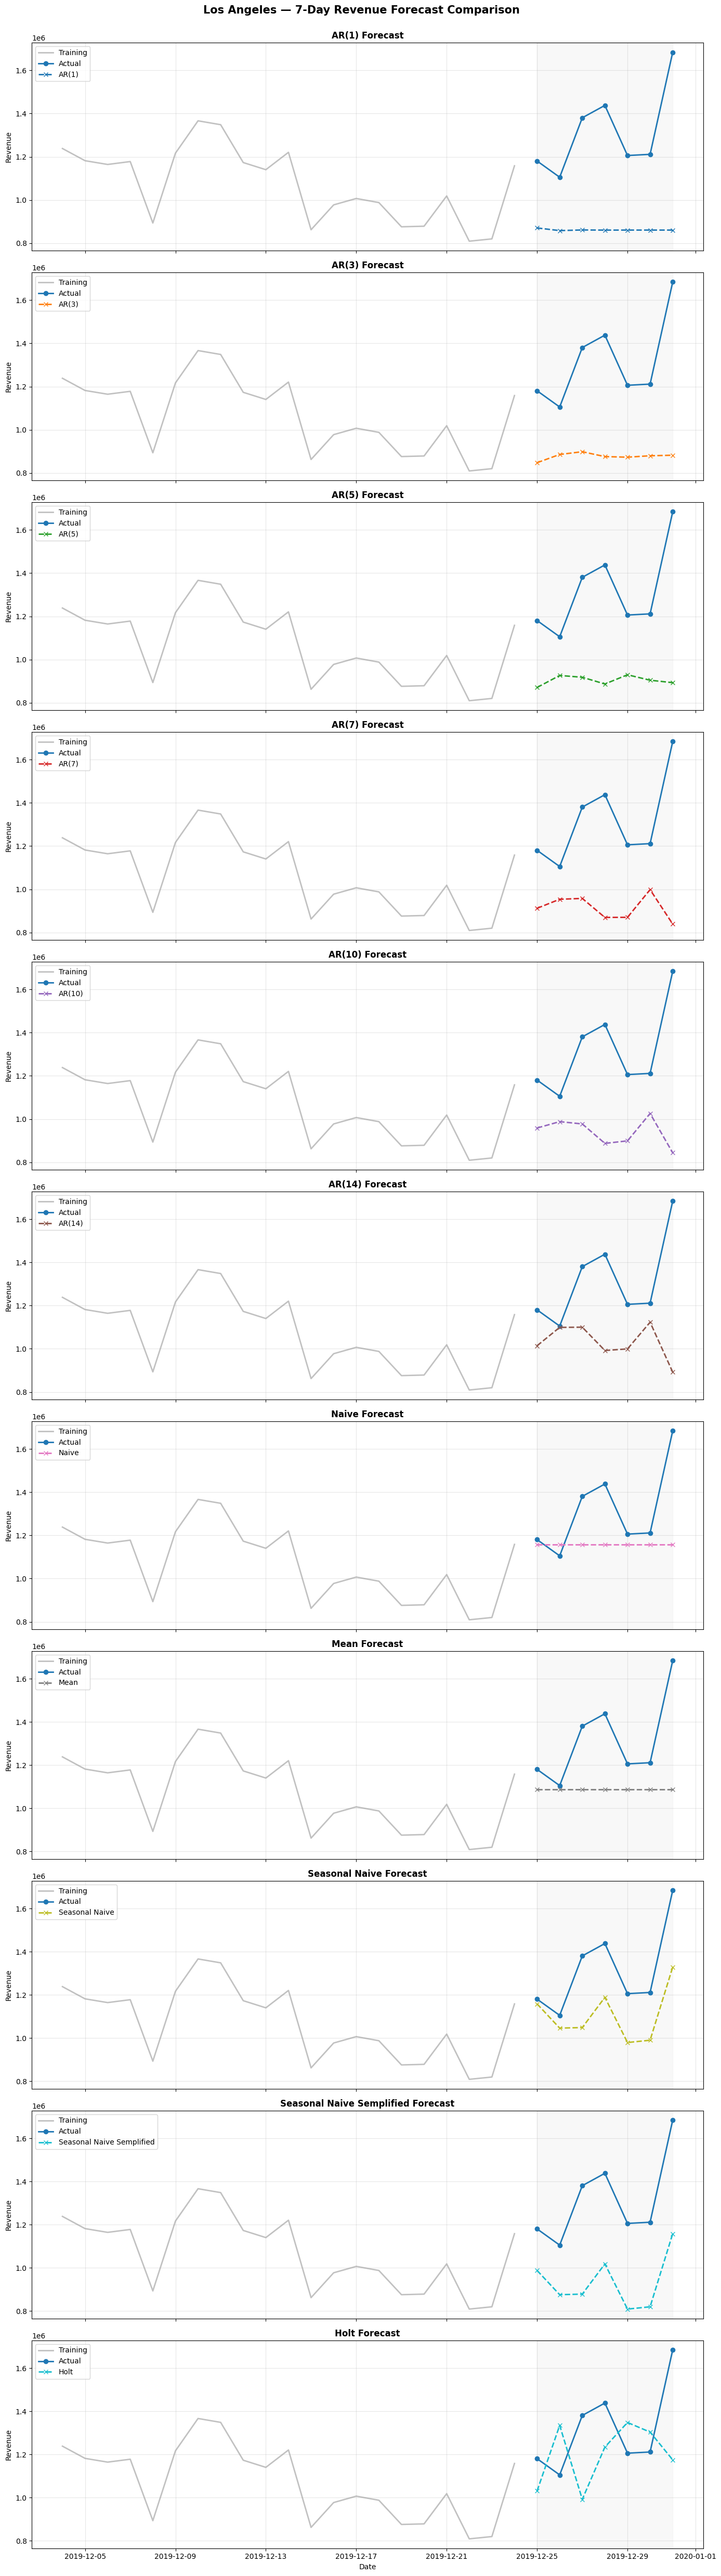

In [397]:
all_predictions = ar_predictions | basic_predictions 

all_predictions["Holt"] = y_hat_last_7

tot_pred = len(all_predictions)

# for k in all_predictions.keys():
#     all_predictions[k] = list(all_predictions[k])
    
def get_colors(n_colors):
    cmap = plt.cm.get_cmap('tab10')
    return [cmap(i) for i in range(n_colors)]

# for name, forecast in all_predictions.items():
#     if isinstance(forecast, list):
#         forecast_array = np.array([f.item() if isinstance(f, np.ndarray) else f for f in forecast])
#     else:
#         forecast_array = np.array(forecast)
#     all_predictions[name] = forecast_array

tot_pred = len(all_predictions)
fig, axes = plt.subplots(tot_pred, 1, figsize=(14, 4.5*tot_pred), sharex=True)

colors = get_colors(tot_pred)

forecast_index = test.index

for ax, (name, forecast), color in zip(axes, all_predictions.items(), colors):
    ax.plot(train.index[plot_start:], train.iloc[plot_start:], 
            color='#999999', label='Training', linewidth=2, alpha=0.6)
    ax.plot(test.index, test.values, 
            color='#1f77b4', label='Actual', marker='o', linewidth=2)
    ax.plot(forecast_index, forecast,  
            color=color, linestyle='--', marker='x', linewidth=2, label=f'{name}')
    ax.axvspan(test.index[0], test.index[-1], color='lightgray', alpha=0.15)
    ax.set_title(f"{name} Forecast", fontweight='bold')
    ax.set_ylabel("Revenue")
    ax.grid(alpha=0.3)
    ax.legend(loc='upper left')

plt.suptitle("Los Angeles — 7-Day Revenue Forecast Comparison", fontsize=15, weight='bold', y = 1)
plt.xlabel("Date")
plt.tight_layout()
plt.show()


# Predict next 7 days

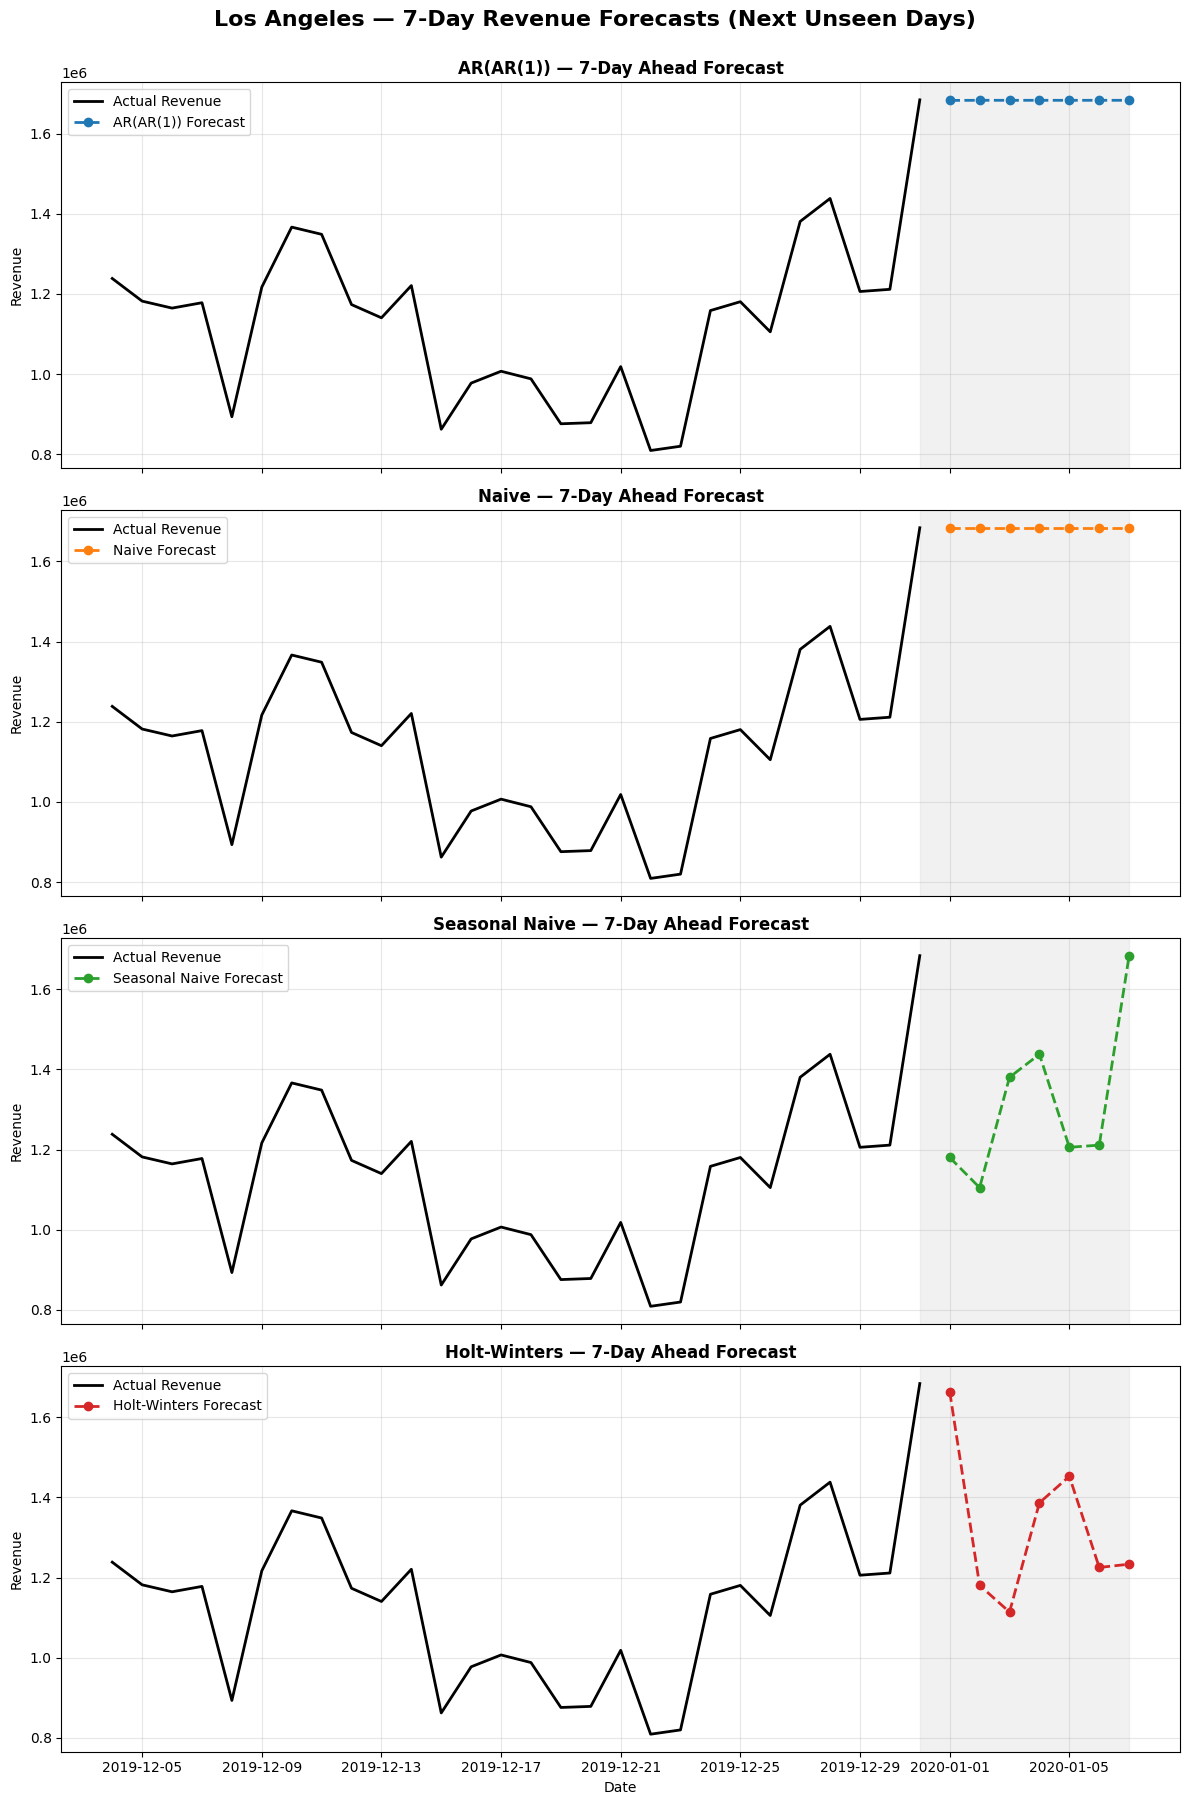

In [398]:
# --- STEP 1: Setup ---
steps_ahead = 7
p = 7  # weekly seasonality

y_orig = df['Revenue']
y_diff = df['Revenue_diff']
y_orig = y_orig[y_diff.index]  # align indexes

# --- STEP 2: Fit the AR model on differenced data ---
best_model.fit(y_diff)

# --- STEP 3: Forecast next 7 days for AR model (inverted to original scale) ---
forecast_diff_ar = best_model.predict(y_diff, steps_ahead=steps_ahead).values
last_revenue = y_orig.iloc[-1]
forecast_revenue_ar = last_revenue + np.cumsum(forecast_diff_ar)

# --- STEP 4: Forecast next 7 days for baselines ---

# Naive → repeats the last observed value
forecast_naive = np.tile(y_orig.iloc[-1], steps_ahead)

# Seasonal Naive → repeats the last "season" (p = 7)
last_season = y_orig.iloc[-p:].values
forecast_seasonal = np.tile(last_season, int(np.ceil(steps_ahead / p)))[:steps_ahead]

# --- STEP 4b: Forecast next 7 days for Holt-Winters ---
s_init = y_orig.iloc[-steps_ahead:].values

forecast_hw = holt_winters(
    y_orig.values, 
    s_init=s_init, 
    h=steps_ahead,
    alpha=alpha, 
    beta=beta, 
    gamma=gamma, 
    m=steps_ahead
)

# --- STEP 5: Create date index for the next 7 days ---
if isinstance(y_orig.index, pd.DatetimeIndex):
    forecast_index = pd.date_range(
        start=y_orig.index[-1] + pd.Timedelta(days=1),
        periods=steps_ahead,
        freq='D'
    )
else:
    forecast_index = np.arange(y_orig.index[-1] + 1, y_orig.index[-1] + 1 + steps_ahead)

# --- STEP 6: Collect forecasts into a dictionary ---
all_predictions = {
    f"AR({best_lag})": forecast_revenue_ar,
    "Naive": forecast_naive,
    "Seasonal Naive": forecast_seasonal,
    "Holt-Winters": forecast_hw
}


# --- STEP 7: Plot actual vs forecasts ---
def get_colors(n_colors):
    cmap = plt.cm.get_cmap('tab10')
    return [cmap(i) for i in range(n_colors)]

tot_pred = len(all_predictions)
fig, axes = plt.subplots(tot_pred, 1, figsize=(12, 18), sharex=True)

colors = get_colors(tot_pred)

for ax, (name, forecast), color in zip(axes, all_predictions.items(), colors):
    # Plot from plot_start to the end
    ax.plot(y_orig.index[plot_start:], y_orig.values[plot_start:], 
            color='black', label='Actual Revenue', linewidth=2)
    
    # Plot the forecast continuation
    ax.plot(forecast_index, forecast, 
            linestyle='--', marker='o', color=color, linewidth=2, label=f'{name} Forecast')
    
    # Highlight forecast area
    ax.axvspan(y_orig.index[-1], forecast_index[-1], color='lightgray', alpha=0.3)
    
    ax.set_title(f"{name} — 7-Day Ahead Forecast", fontweight='bold')
    ax.set_ylabel("Revenue")
    ax.grid(alpha=0.3)
    ax.legend(loc='upper left')

plt.suptitle("Los Angeles — 7-Day Revenue Forecasts (Next Unseen Days)", fontsize=16, weight='bold', y = 1)
plt.xlabel("Date")
plt.tight_layout()
plt.show()

## Filter Residuals

### Holt-Winters residual diagnostics


Residual summary:
count      2216.000000
mean        190.965749
std      161481.236091
min     -616345.488241
25%      -70713.385235
50%       19628.377763
75%       97075.948590
max      676394.371206
Name: HW_residuals, dtype: float64
Mean ~ 0? 190.9657


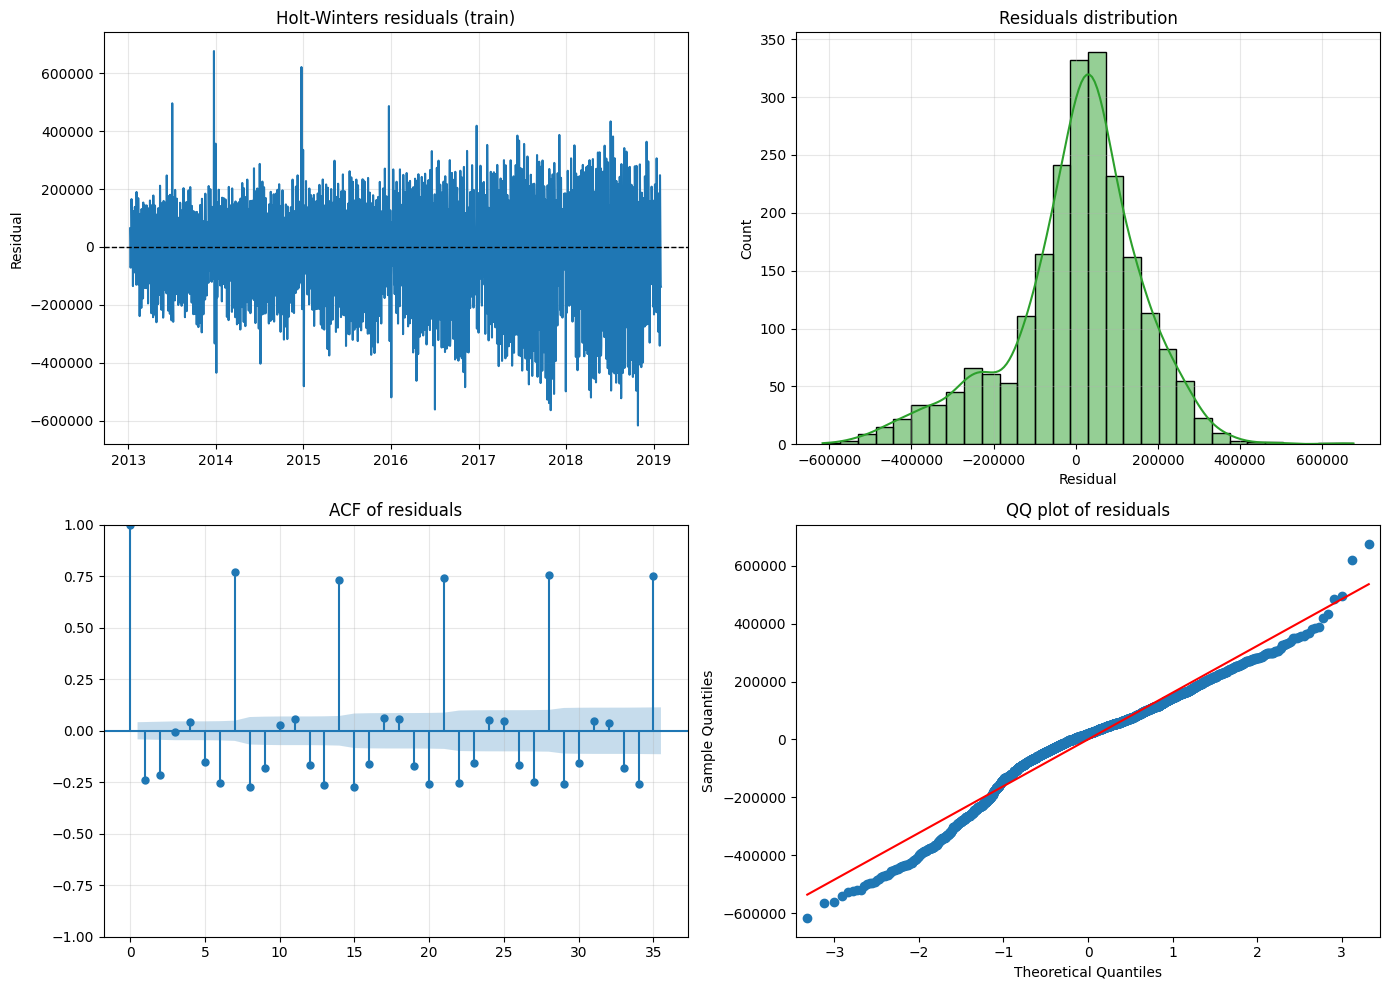


Ljung-Box test (no autocorrelation in residuals):
        lb_stat  lb_pvalue
7   1747.850320        0.0
14  3408.831419        0.0
35  8514.883469        0.0

Shapiro-Wilk test (normality of residuals):
{'stat': 0.9647227071706536, 'pvalue': 7.468091970111761e-23}


In [404]:
# Compute in-sample one-step-ahead residuals for Holt-Winters and run diagnostics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy import stats

# Assumptions: variables defined earlier in the notebook
# - df_tr: training series (pd.Series)
# - holt_winters: custom HW function defined above
# - best_pars: optimal (alpha, beta, gamma)
# - steps_ahead: seasonal period m (7)

alpha, beta, gamma = [float(x) for x in best_pars]
m = int(steps_ahead)

# Use the first full season to initialize seasonal component to avoid leakage
s_init_train = df_tr.iloc[:m].values

# Build rolling one-step-ahead fitted values on the training set
residuals = []
fitted = []
fit_index = df_tr.index[m:]
train_values = df_tr.values

for t in range(m, len(train_values)):
    history = train_values[:t]
    # 1-step-ahead forecast
    yhat_t = holt_winters(history, s_init=s_init_train, h=1, alpha=alpha, beta=beta, gamma=gamma, m=m)[0]
    fitted.append(yhat_t)
    residuals.append(train_values[t] - yhat_t)

resid_series = pd.Series(residuals, index=fit_index, name="HW_residuals")
fitted_series = pd.Series(fitted, index=fit_index, name="HW_fitted")

# Quick summary
print("Residual summary:")
print(resid_series.describe())
print(f"Mean ~ 0? {resid_series.mean():.4f}")

# Plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1) Residual time plot
axes[0,0].plot(resid_series.index, resid_series.values, color='tab:blue', linewidth=1.5)
axes[0,0].axhline(0.0, color='black', linestyle='--', linewidth=1)
axes[0,0].set_title('Holt-Winters residuals (train)')
axes[0,0].set_ylabel('Residual')
axes[0,0].grid(alpha=0.3)

# 2) Histogram + KDE
sns.histplot(resid_series, bins=30, kde=True, ax=axes[0,1], color='tab:green')
axes[0,1].set_title('Residuals distribution')
axes[0,1].set_xlabel('Residual')
axes[0,1].grid(alpha=0.3)

# 3) ACF of residuals
plot_acf(resid_series, lags=min(35, len(resid_series)-2), ax=axes[1,0])
axes[1,0].set_title('ACF of residuals')
axes[1,0].grid(alpha=0.3)

# 4) QQ-plot
qqplot(resid_series, line='s', ax=axes[1,1])
axes[1,1].set_title('QQ plot of residuals')

plt.tight_layout()
plt.show()

# Statistical tests
print("\nLjung-Box test (no autocorrelation in residuals):")
# Check at a few lag checkpoints including seasonality
lags_to_check = [m, 2*m, min(35, len(resid_series)//2)]
lb = acorr_ljungbox(resid_series, lags=lags_to_check, return_df=True)
print(lb)

print("\nShapiro-Wilk test (normality of residuals):")
shapiro_stat, shapiro_p = stats.shapiro(resid_series.dropna().values)
print({"stat": shapiro_stat, "pvalue": shapiro_p})
